In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.dates as mdates
import seaborn as sns

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 12, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
# clean first dataset
O = './dataset/O.csv' 
df_O = pd.read_csv(O, encoding= 'unicode_escape')
df_O = df_O.drop(df_O.columns[[0,3,4,5,6]], axis=1)
df_O['ts'] = pd.to_datetime(df_O['ts'])
df_O['weekday'] = df_O['ts'].dt.day_name()
df_O['hour'] = df_O['ts'].dt.hour

df_O.head()

,device_id,ts,HIC,Humidity,Temperature,time,weekday,hour
0,665,2021-05-03 18:52:25,22.20950,28.5,23.1,115621,Monday,18
1,665,2021-05-03 18:52:35,22.10211,28.6,23.0,125714,Monday,18
2,665,2021-05-03 18:52:45,21.98951,28.5,22.9,135777,Monday,18
3,665,2021-05-03 18:52:55,21.88211,28.6,22.8,145824,Monday,18
4,665,2021-05-03 18:53:05,21.77995,28.9,22.7,155870,Monday,18


In [3]:
# clean second dataset
S = './dataset/S.csv' 
df_S = pd.read_csv(S, sep=';', encoding= 'unicode_escape')
df_S = df_S.drop(df_S.columns[[0,3,4,5,6,9,10]], axis=1)
df_S['ts'] = pd.to_datetime(df_S['ts'])
df_S['weekday'] = df_S['ts'].dt.day_name()
df_S['hour'] = df_S['ts'].dt.hour
df_S.head()

,device_id,ts,HIC,Humidity,Temperature,time,weekday,hour
0,-1,2021-05-03 21:05:44,23.91365,39.0,24.4,3581797.0,Monday,21
1,-1,2021-05-03 21:06:15,23.91365,39.0,24.4,3611881.0,Monday,21
2,-1,2021-05-03 21:06:45,23.80365,39.0,24.3,3641956.0,Monday,21
3,-1,2021-05-03 21:07:15,23.91365,39.0,24.4,3672036.0,Monday,21
4,-1,2021-05-03 21:07:45,23.93976,40.0,24.4,3702115.0,Monday,21


In [8]:
weather = './dataset/weather.csv' 
df_weather = pd.read_csv(weather, encoding= 'unicode_escape')
df_weather = df_weather.drop(df_weather.columns[[2,3]], axis=1)
df_weather['Date time'] = pd.to_datetime(df_weather['Date time'])
df_weather['weekday'] = df_weather['Date time'].dt.day_name()
df_weather['hour'] = df_weather['Date time'].dt.hour
df_weather.head()

,Name,Date time,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,weekday,hour
0,"Eindhoven, Noord-Brabant, Nederland",2021-05-03 00:00:00,3.8,2.7,NaN,0.0,0,0,5.0,267,10.4,20.4,0.0,75.90,Clear,Monday,0
1,"Eindhoven, Noord-Brabant, Nederland",2021-05-03 00:30:00,3.9,2.8,NaN,0.0,0,0,5.3,280,NaN,10.0,0.0,75.10,Clear,Monday,0
2,"Eindhoven, Noord-Brabant, Nederland",2021-05-03 01:00:00,1.2,NaN,NaN,0.0,0,0,4.8,243,7.1,17.7,0.0,85.45,Clear,Monday,1
3,"Eindhoven, Noord-Brabant, Nederland",2021-05-03 01:30:00,1.0,-0.6,NaN,0.0,0,0,5.5,230,NaN,10.0,0.0,86.22,Clear,Monday,1
4,"Eindhoven, Noord-Brabant, Nederland",2021-05-03 02:00:00,0.7,NaN,NaN,0.0,0,0,3.7,202,21.1,17.5,0.0,92.44,Clear,Monday,2


In [207]:
# combine two dataframe
df_combined = pd.concat([df_O,df_S])
df_combined.head()

,device_id,ts,HIC,Humidity,Temperature,time,weekday,hour
0,665,2021-05-03 18:52:25,22.20950,28.5,23.1,115621.0,Monday,18
1,665,2021-05-03 18:52:35,22.10211,28.6,23.0,125714.0,Monday,18
2,665,2021-05-03 18:52:45,21.98951,28.5,22.9,135777.0,Monday,18
3,665,2021-05-03 18:52:55,21.88211,28.6,22.8,145824.0,Monday,18
4,665,2021-05-03 18:53:05,21.77995,28.9,22.7,155870.0,Monday,18


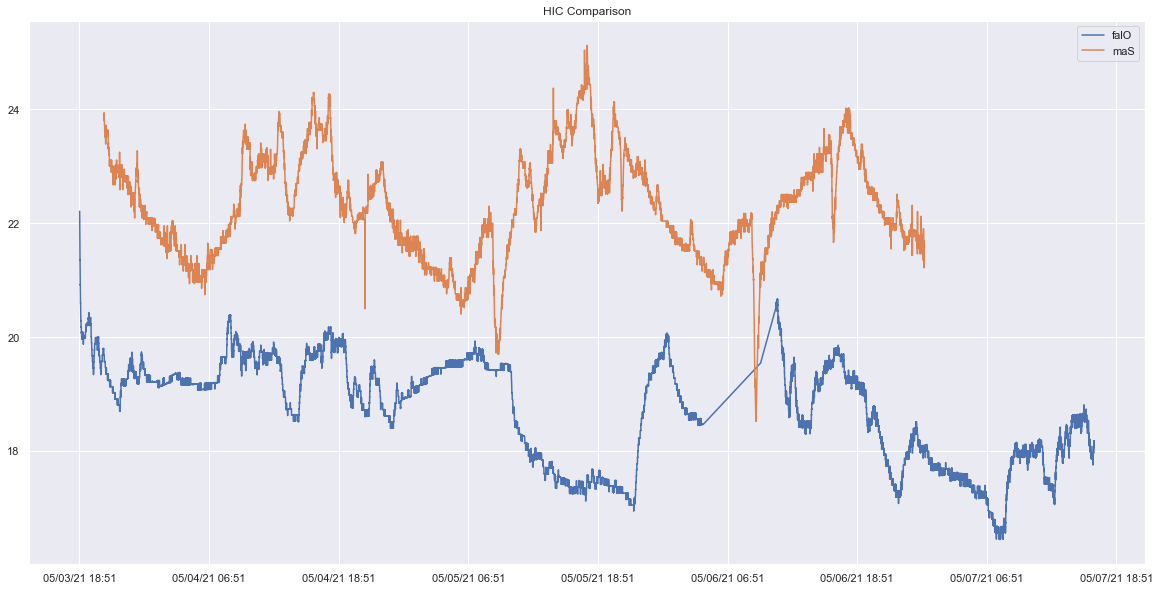

In [208]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1, 1)  
plt.plot( df_O['ts'], df_O['HIC'], color="#4C72B0")
plt.plot(df_S['ts'], df_S['HIC'], color="#DD8452")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("HIC Comparison")
ax.legend(["falO","maS"])
# save graph
fig.savefig('HIC Comparison.png')

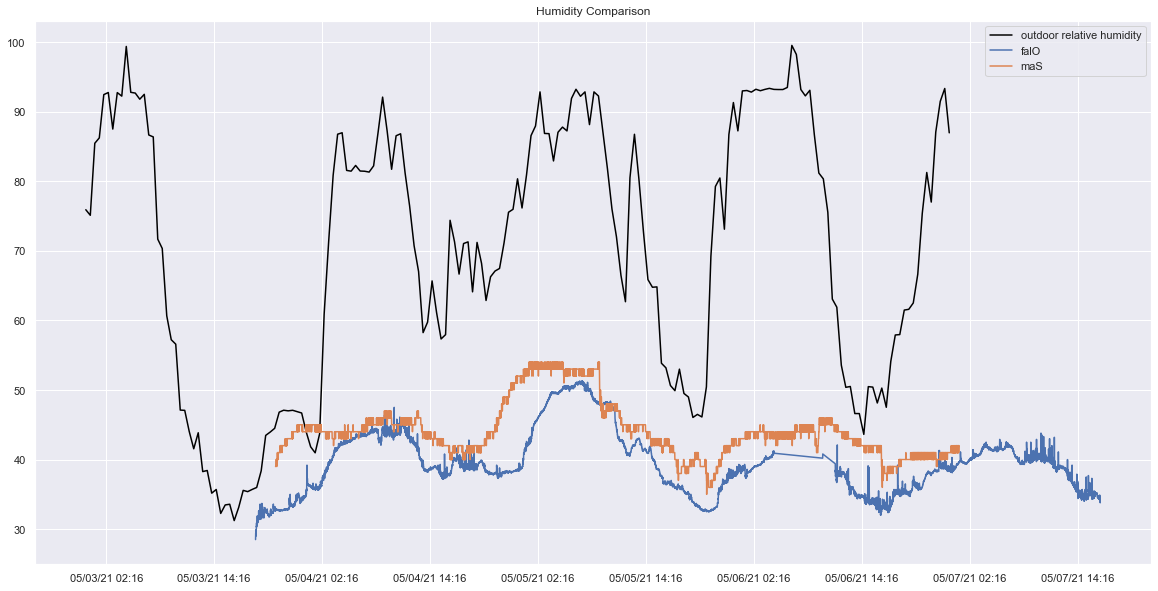

In [10]:
fig2 = plt.figure(figsize=(20, 10))
ax = fig2.add_subplot(1,1, 1)  
plt.plot( df_weather['Date time'], df_weather['Relative Humidity'], color="#000000")
plt.plot( df_O['ts'], df_O['Humidity'], color="#4C72B0")
plt.plot(df_S['ts'], df_S['Humidity'], color="#DD8452")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("Humidity Comparison")
ax.legend(["outdoor relative humidity","falO","maS"])
# save graph
fig2.savefig('Humidity Comparison.png')

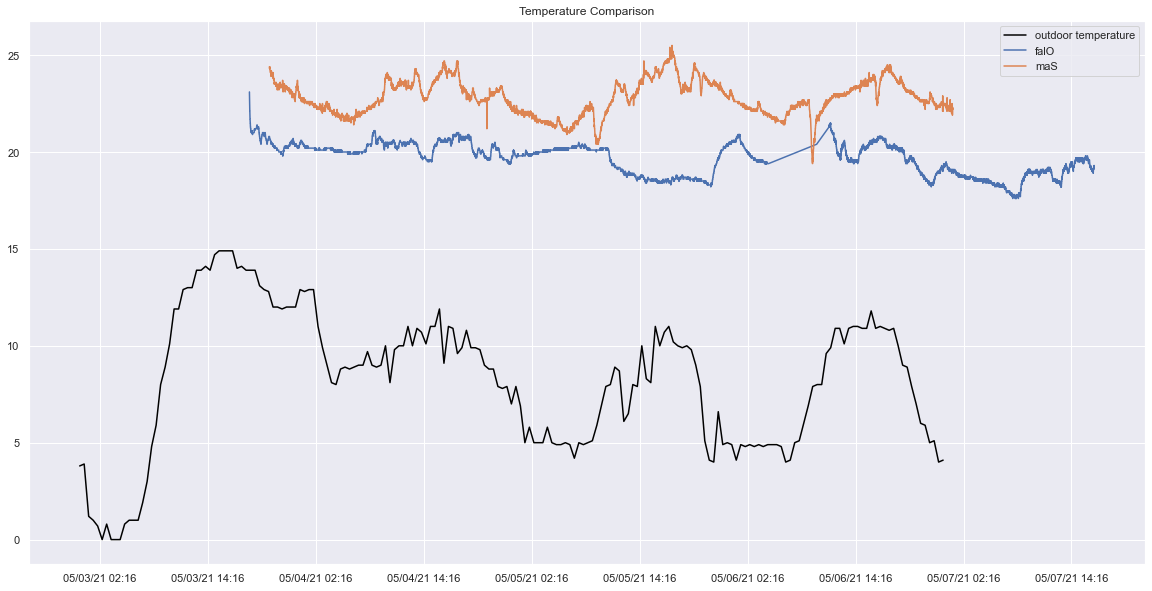

In [11]:
fig3 = plt.figure(figsize=(20, 10))
ax = fig3.add_subplot(1,1, 1)  
plt.plot( df_weather['Date time'], df_weather['Temperature'], color="#000000")
plt.plot( df_O['ts'], df_O['Temperature'], color="#4C72B0")
plt.plot(df_S['ts'], df_S['Temperature'], color="#DD8452")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=720))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D %H:%M'))     #optional formatting 
ax.set_title("Temperature Comparison")
ax.legend(["outdoor temperature","falO","maS"])
# save graph
fig3.savefig('Temperature Comparison.png')

In [211]:
grouped = df_O.groupby(['weekday', 'hour'])
df_O_Tem = grouped['Temperature'].mean().reset_index()
grouped = df_S.groupby(['weekday', 'hour'])
df_S_Tem = grouped['Temperature'].mean().reset_index()

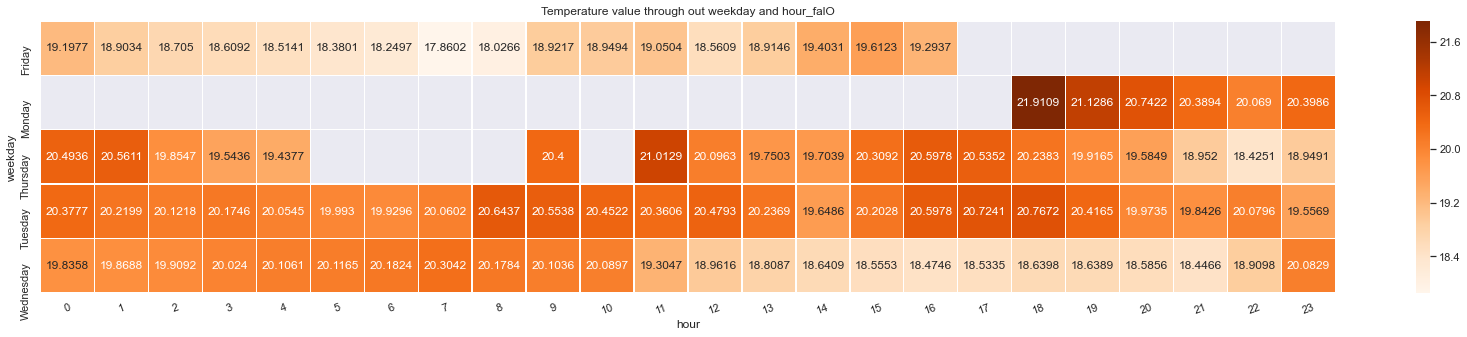

In [212]:
flights = df_O_Tem.pivot("weekday", "hour", "Temperature")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights, annot=True, fmt="g",cmap="Oranges", linewidths=.5, ax=ax).set_title('Temperature value through out weekday and hour_falO')
plt.xticks(rotation = 20)
f.savefig('Temperature values through out weekday and hour_falO.png')

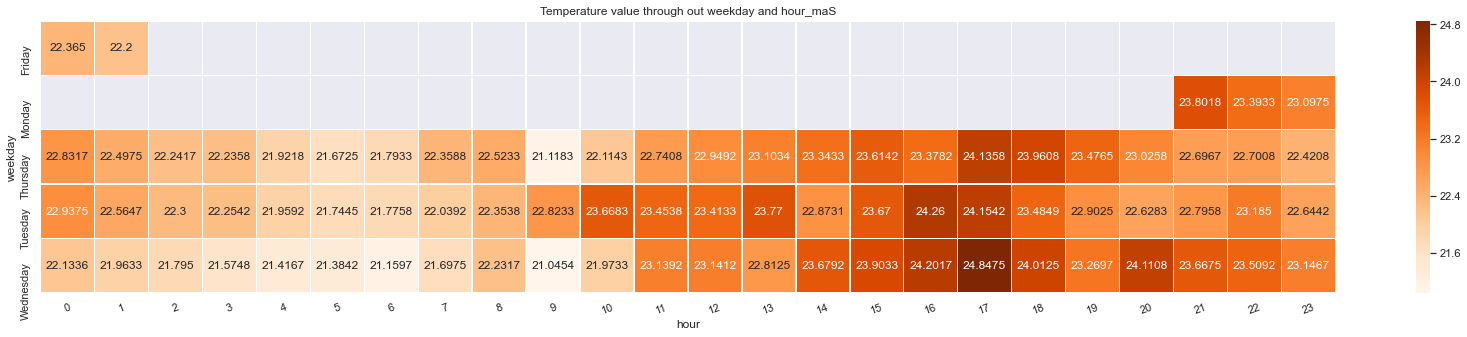

In [188]:
flights1 = df_S_Tem.pivot("weekday", "hour", "Temperature")

# Draw a heatmap with the numeric values in each cell
f1, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights1, annot=True, fmt="g",cmap="Oranges", linewidths=.5, ax=ax).set_title('Temperature value through out weekday and hour_maS')
plt.xticks(rotation = 20)
f1.savefig('Temperature values through out weekday and hour_maS.png')

In [215]:
grouped = df_O.groupby(['weekday', 'hour'])
df_O_Hum = grouped['Humidity'].mean().reset_index()
grouped = df_S.groupby(['weekday', 'hour'])
df_S_Hum = grouped['Humidity'].mean().reset_index()

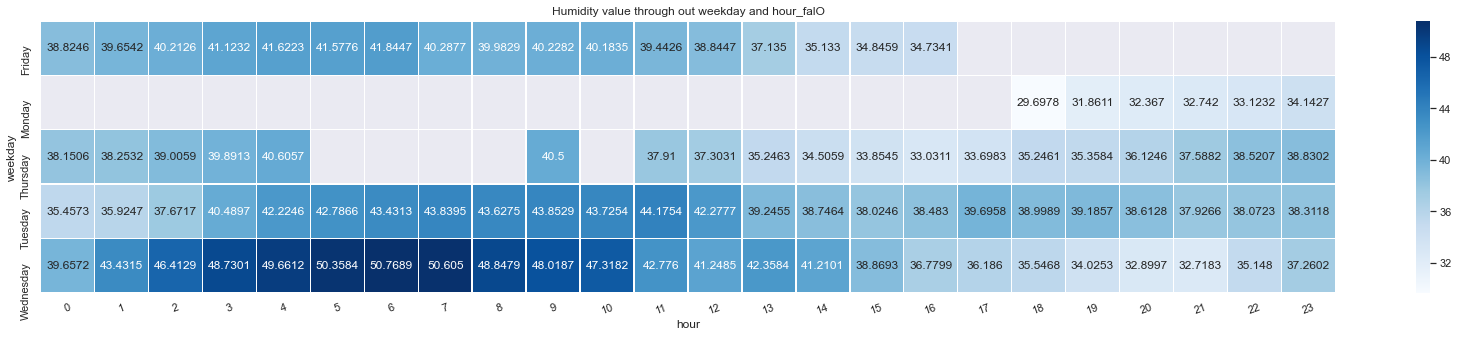

In [216]:
flights2 = df_O_Hum.pivot("weekday", "hour", "Humidity")

# Draw a heatmap with the numeric values in each cell
f2, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights2, annot=True, fmt="g",cmap="Blues", linewidths=.5, ax=ax).set_title('Humidity value through out weekday and hour_falO')
plt.xticks(rotation = 20)
f2.savefig('Humidity values through out weekday and hour_falO.png')

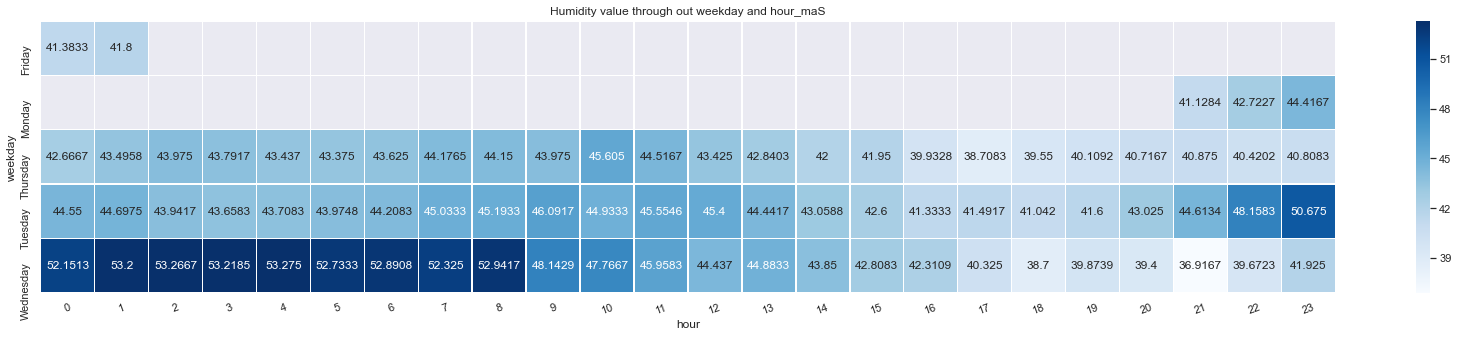

In [217]:
flights3 = df_S_Hum.pivot("weekday", "hour", "Humidity")

# Draw a heatmap with the numeric values in each cell
f3, ax = plt.subplots(figsize=(29, 5))
sns.heatmap(flights3, annot=True, fmt="g",cmap="Blues", linewidths=.5, ax=ax).set_title('Humidity value through out weekday and hour_maS')
plt.xticks(rotation = 20)
f3.savefig('Humidity values through out weekday and hour_maS.png')

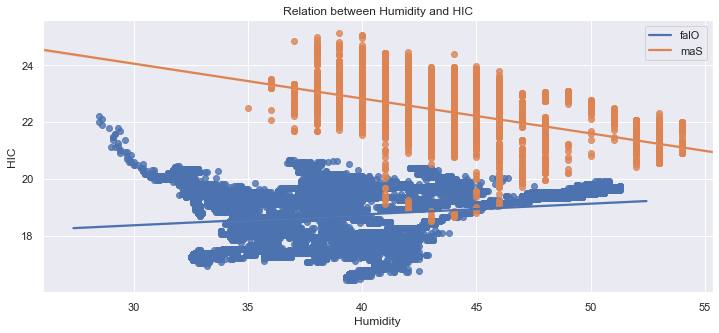

In [218]:
sns.regplot(x="Humidity",  y="HIC", data=df_O, color="#4C72B0").set_title('Relation between Humidity and HIC');
sns.regplot(x="Humidity", y="HIC", data=df_S, color="#DD8452");
plt.legend(labels=['falO', 'maS'])

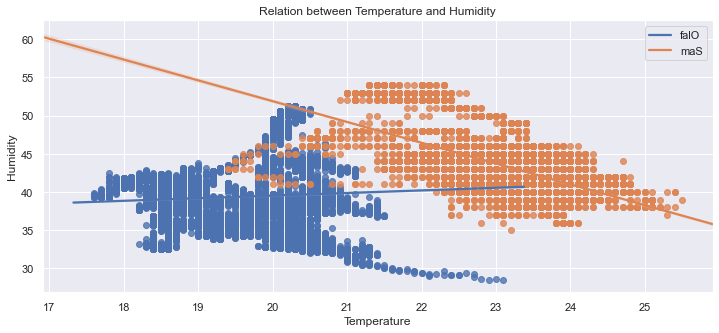

In [219]:
sns.regplot(x="Temperature",  y="Humidity", data=df_O, color="#4C72B0").set_title('Relation between Temperature and Humidity');
sns.regplot(x="Temperature", y="Humidity", data=df_S, color="#DD8452");
plt.legend(labels=['falO', 'maS'])

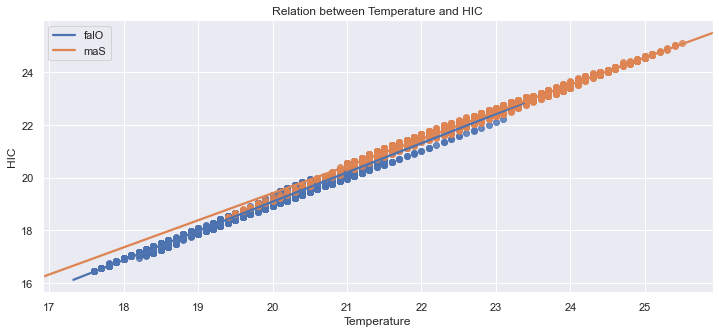

In [221]:
sns.regplot(x="Temperature",  y="HIC", data=df_O, color="#4C72B0").set_title('Relation between Temperature and HIC');
sns.regplot(x="Temperature", y="HIC", data=df_S, color="#DD8452");
plt.legend(labels=['falO', 'maS'])

In [224]:
#Downloading weather data using Python as a CSV using the Visual Crossing Weather API
#See https://www.visualcrossing.com/resources/blog/how-to-load-historical-weather-data-using-python-without-scraping/ for more information.
import csv
import codecs
import urllib.request
import sys

In [226]:
# This is the core of our weather query URL
BaseURL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/'

if len(sys.argv) < 4:
    print('')
    print('Usage: Location QueryType API_KEY FROMDATE TODATE')
    print()
    print('  Location: Please provide a location for the weather search.')
    print('    (Make sure to use quotes if the name contains spaces.)')
    print('  Date: Please specify a date in the format YYYY-MM-DD to look up weather for a specific date.')
    print('    Or use the FORECAST to look up the current weather forcast.')
    print('  API_KEY: Please specify your Visual Crossing Weather API Key')
    print('    If you don\'t already have an API Key, sign up for one at https://www.visualcrossing.com/weather-api.')
    print()
    print('Example: \"Herndon, VA\" HISTORY YOUR_API_KEY 2019-01-01 2019-01-07')
    print('Example: \"Beverly Hills, CA\" FORECAST YOUR_API_KEY')
    print()
    sys.exit()

print('')
print(' - Requesting weather for: ', sys.argv[1])

# Set up the location parameter for our query
QueryLocation = '&location=' + urllib.parse.quote(sys.argv[1])

# Set up the query type parameter for our query ('FORECAST' or 'HISTORY')
QueryType=sys.argv[2].upper()

# Set up the key parameter for our query
QueryKey = '&key=' + sys.argv[3]

# Set up the date parameters for our query. Used only for historical weather data requests
if len(sys.argv) >4:
    FromDateParam = sys.argv[4]
    ToDateParam = sys.argv[5]


Usage: Location QueryType API_KEY FROMDATE TODATE

  Location: Please provide a location for the weather search.
    (Make sure to use quotes if the name contains spaces.)
  Date: Please specify a date in the format YYYY-MM-DD to look up weather for a specific date.
    Or use the FORECAST to look up the current weather forcast.
  API_KEY: Please specify your Visual Crossing Weather API Key
    If you don't already have an API Key, sign up for one at https://www.visualcrossing.com/weather-api.

Example: "Herndon, VA" HISTORY YOUR_API_KEY 2019-01-01 2019-01-07
Example: "Beverly Hills, CA" FORECAST YOUR_API_KEY



SystemExit: 

In [223]:
# Set up the specific parameters based on the type of query
if QueryType == 'HISTORY':
    print(' - Fetching forecast data')
    QueryTypeParams = 'forecast?&aggregateHours=24&unitGroup=us&shortColumnNames=false'
else:
    print(' - Fetching history for date: ', FromDateParam,'-',ToDateParam)

    # History requests require a date.  We use the same date for start and end since we only want to query a single date in this example
    QueryDate = '&startDateTime=' + FromDateParam + 'T00:00:00&endDateTime=' +ToDateParam + 'T00:00:00'
    QueryTypeParams = 'history?&aggregateHours=24&unitGroup=us&dayStartTime=0:0:00&dayEndTime=0:0:00' + QueryDate


# Build the entire query
URL = BaseURL + QueryTypeParams + QueryLocation + QueryKey

print(' - Running query URL: ', URL)
print()

# Parse the results as CSV
CSVBytes = urllib.request.urlopen(URL)
CSVText = csv.reader(codecs.iterdecode(CSVBytes, 'utf-8'))

RowIndex = 0

# The first row contain the headers and the additional rows each contain the weather metrics for a single day
# To simply our code, we use the knowledge that column 0 contains the location and column 1 contains the date.  The data starts at column 4
for Row in CSVText:
    if RowIndex == 0:
        FirstRow = Row
    else:
        print('Weather in ', Row[0], ' on ', Row[1])

        ColIndex = 0
        for Col in Row:
            if ColIndex >= 4:
                print('   ', FirstRow[ColIndex], ' = ', Row[ColIndex])
            ColIndex += 1
    RowIndex += 1

# If there are no CSV rows then something fundamental went wrong
if RowIndex == 0:
    print('Sorry, but it appears that there was an error connecting to the weather server.')
    print('Please check your network connection and try again..')

# If there is only one CSV  row then we likely got an error from the server
if RowIndex == 1:
    print('Sorry, but it appears that there was an error retrieving the weather data.')
    print('Error: ', FirstRow)

print()



Usage: Location QueryType API_KEY FROMDATE TODATE

  Location: Please provide a location for the weather search.
    (Make sure to use quotes if the name contains spaces.)
  Date: Please specify a date in the format YYYY-MM-DD to look up weather for a specific date.
    Or use the FORECAST to look up the current weather forcast.
  API_KEY: Please specify your Visual Crossing Weather API Key
    If you don't already have an API Key, sign up for one at https://www.visualcrossing.com/weather-api.

Example: "Herndon, VA" HISTORY YOUR_API_KEY 2019-01-01 2019-01-07
Example: "Beverly Hills, CA" FORECAST YOUR_API_KEY



SystemExit: 

C:\Users\20175115\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
